In [20]:
from virusPropagationModel import *
import glob
import os
import matplotlib.pyplot as plt
from multiprocessing import Pool
from math import sqrt
import pandas as pd
#from joblib import Parallel, delayed
%matplotlib inline

Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(10))
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [5]:
modeledWorld1 = ModeledPopulatedWorld(1000,10, world_from_file=True, geofile_name='datafiles/Buildings_Gangelt_MA_3.csv', agent_agent_infection=True, input_schedules='schedules_v1')


In [16]:
import os


In [8]:
#modeledWorld1.save('p_world', date_suffix=False)
World1 = load_simulation_object('p_world')


In [9]:
simulation1 = Simulation(World1,400,run_immediately=False)
simulation1.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.2,'type':'replacement'}}})
simulation1.simulate()
simulation1.save('sim1', date_suffix=False)

In [112]:
for i in range(10):
    simulation = Simulation(World1,400,run_immediately=False)
    simulation.change_agent_attributes({'all':{'behaviour_as_infected':{'value':0.2,'type':'replacement'}}})
    simulation.simulate()
    simulation.save('sim'+str(i), date_suffix=False)

In [13]:
simulation1 = load_simulation_object('sim1')
simulation2 = load_simulation_object('sim2')

In [18]:
st=simulation1.get_status_trajectories()#reopen_schools_100_89_simulationObj.pkl

In [113]:
simulations = [load_simulation_object('sim'+str(i))for i in range(10)]

In [114]:
st_l = [s.get_status_trajectories() for s in simulations]

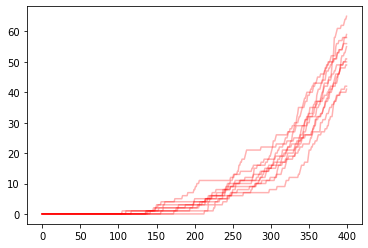

In [116]:
plt.figure(1)
for i,st in enumerate(st_l):
    if i == 0:
        df1 = st['R'].copy()
    else:
        df_sims =df1.set_index('time').join(st['R'].copy().set_index('time'), rsuffix='_1').reset_index()

    t= st['R']['time']
    R = st['R']['R']
    plt.plot(t,R,  'r', alpha=0.3,label=str(i))
    
#plt.plot(t, df.mean(axis=1),'k')
#plt.plot(t, df.mean(axis=1)-df.std(axis=1, ddof=0),'gray') 
#plt.plot(t, df.mean(axis=1)+df.std(axis=1,ddof=0),'gray') 

In [73]:
df1 = st['R'].copy()

df1.join(st['R'].copy(), on='time', rsuffix='_1')#, left_on='lkey', right_on='rkey', suffixes=(False, False))

df1.set_index('time').join(st['R'].copy().set_index('time'), rsuffix='_1').reset_index()

TypeError: join() got an unexpected keyword argument 'inplace'

In [82]:
[st_l[i]['R'] for i in range(2)]

[     time     R
 0       0   0.0
 1       1   0.0
 2       2   0.0
 3       3   0.0
 4       4   0.0
 ..    ...   ...
 395   395  30.0
 396   396  30.0
 397   397  30.0
 398   398  30.0
 399   399  30.0
 
 [400 rows x 2 columns],
      time     R
 0       0   0.0
 1       1   0.0
 2       2   0.0
 3       3   0.0
 4       4   0.0
 ..    ...   ...
 395   395  48.0
 396   396  48.0
 397   397  48.0
 398   398  50.0
 399   399  51.0
 
 [400 rows x 2 columns]]

In [134]:
import matplotlib.cm as cm 

cmap = cm.get_cmap('Set1')

filename = 'scenario_1'

for i,stat in enumerate(['I','S','R','D']):

    try:
        df = pd.concat([st_l[i][stat].set_index('time') for i in range(len(st_l))], axis=1)#, join='outer', join_axes=None, ignore_index=False,
                  #keys=None, levels=None, names=None, verify_integrity=False,
                  #copy=True)
        df.columns = [stat+str(i) for i in range(len(st_l))]
        df.to_csv('outputs/'+filename+'_'+stat+'.csv')
        #df.reset_index().drop('time')

        #df_sims.mean(axis=1)

        ax = df.plot(c=cmap(i),alpha=0.2, legend=False)
        ax.plot()
        df.mean(axis=1).plot()
        ax.set_title(stat); ax.set_ylabel('counts'), ax.set_xlabel('time, h')
    except:
        print(stat+'  is not in list')
        
    plt.savefig('outputs/plots/'+filename+'_'+stat+'.png') 
    plt.close()
#df.std(axis=1, ddof=0)

D  is not in list


In [3]:
def f(x):
    return x*x

In [4]:
with Pool(5) as p:
    print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [10]:
dic = {'a':1,'b':2}
dic.update({'a':1})

In [11]:


[dic.udpate({'a': i}) for i in range(5)]

AttributeError: 'dict' object has no attribute 'udpate'

In [7]:



modeledWorld1 = ModeledPopulatedWorld(1000,10, world_from_file=True, geofile_name='datafiles/Buildings_Gangelt_MA_3.csv', agent_agent_infection=True, input_schedules='schedules_v1')




simulation2=Simulation(simulation1,400, run_immediately=False)
for p in simulation2.people:
    p.stay_home_instead_of_going_to('')
simulation2.simulate() 
simulation2.plot_status_timecourse()
simulation2.export_time_courses_as_csvs(identifier='schools_closed')


with Pool(5) as p:
    print(p.map(f, [1, 2, 3]))

NameError: name 'simulation1' is not defined

In [2]:
(x for x in range(3))

<generator object <genexpr> at 0x1176a3d60>